# Importing the modules

In [1]:
# importing all the modules
import numpy as np
import pandas as pd
import seaborn as sns  
import datetime    
import matplotlib.pyplot as plt 

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the data set
bike_data=pd.read_csv('/content/day.csv')
bike_data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


Checking the shape and null value in our data set

In [3]:
# Checking the shape and null values in particular columns
print(bike_data.shape)
bike_data[bike_data.isnull()].sum()

(730, 16)


instant       0.0
dteday          0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: object

#Dropping the columns which is of no use

In [4]:
# dropping these columns  not useful in finding out target variable as count
bike_data=bike_data.drop(['instant','dteday','casual','registered','atemp'],axis=1)

In [5]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


# Replacing the data into string categories

In [6]:
# replacing the numerical values with respect to categories 
bike_data['season']=bike_data['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bike_data['yr']=bike_data['yr'].replace({0: 2018, 1:2019})

bike_data['mnth']=bike_data['mnth'].replace({1:'January', 2:'February', 3:'March', 4:'April',
                                             5:'May', 6:'June', 7:'July', 8:'August',
                                             9:'September', 10:'October', 11:'November', 12:'December'})

bike_data['holiday']=bike_data['holiday'].replace({0:'Not_official_holiday', 1:'Official_holiday'})


bike_data['weekday']=bike_data['weekday'].replace({0:'Sunday', 1:'Monday',2:'Tuesday', 3:'Wednesday',
                                                   4:'Thrusday', 5:'Friday',6:'Saturday'})


bike_data['workingday']=bike_data['workingday'].replace({0: 'Not_working', 1: 'Working'})

bike_data['weathersit']=bike_data['weathersit'].replace({1: 'Clear', 2: 'Mist_Coludy',
                                                         3: 'Light_snow', 4:'Heavy_rain'})


In [7]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,January,Not_official_holiday,Saturday,Not_working,Mist_Coludy,14.110847,80.5833,10.749882,985
1,spring,2018,January,Not_official_holiday,Sunday,Not_working,Mist_Coludy,14.902598,69.6087,16.652113,801
2,spring,2018,January,Not_official_holiday,Monday,Working,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,January,Not_official_holiday,Tuesday,Working,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,January,Not_official_holiday,Wednesday,Working,Clear,9.305237,43.6957,12.522300,1600


# Checking for outliers

In [8]:
bike_data.describe()

,yr,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,20.319259,62.765175,12.763620,4508.006849
std,0.500343,7.506729,14.237589,5.195841,1936.011647
min,2018.000000,2.424346,0.000000,1.500244,22.000000
25%,2018.000000,13.811885,52.000000,9.041650,3169.750000
50%,2018.500000,20.465826,62.625000,12.125325,4548.500000
75%,2019.000000,26.880615,72.989575,15.625589,5966.000000
max,2019.000000,35.328347,97.250000,34.000021,8714.000000


#Univariate analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


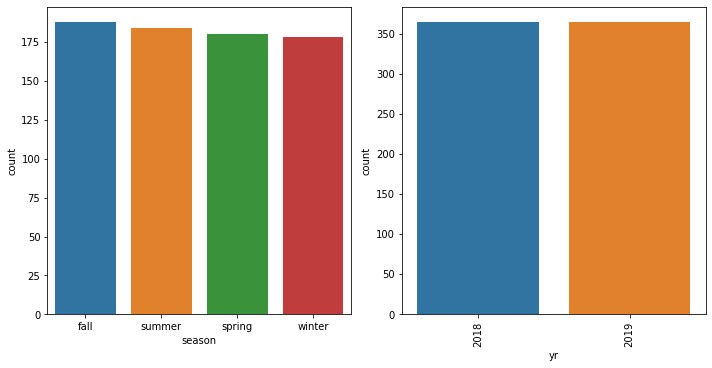

In [9]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(bike_data['season'],ax=axes[0],order = bike_data['season'].value_counts().index)
sns.countplot(bike_data['yr'],ax=axes[1],order = bike_data['yr'].value_counts().index)

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Trying to analyze the count for different season and year how it had affected the  bike sharing number

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


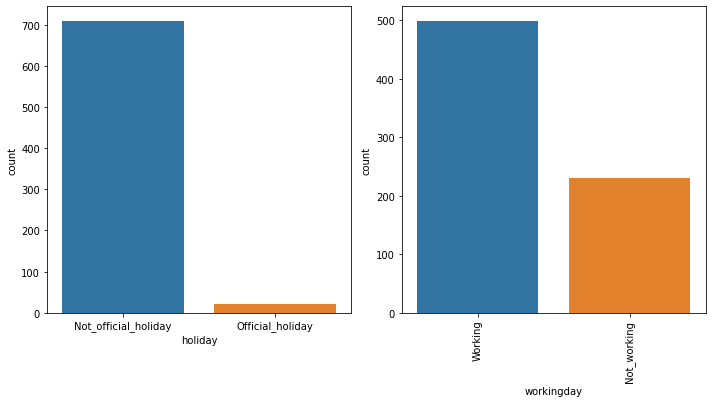

In [10]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(bike_data['holiday'],ax=axes[0],order = bike_data['holiday'].value_counts().index)
sns.countplot(bike_data['workingday'],ax=axes[1],order = bike_data['workingday'].value_counts().index)

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Trying to analyze the different holiday and working day  how it had affected the  bike sharing number

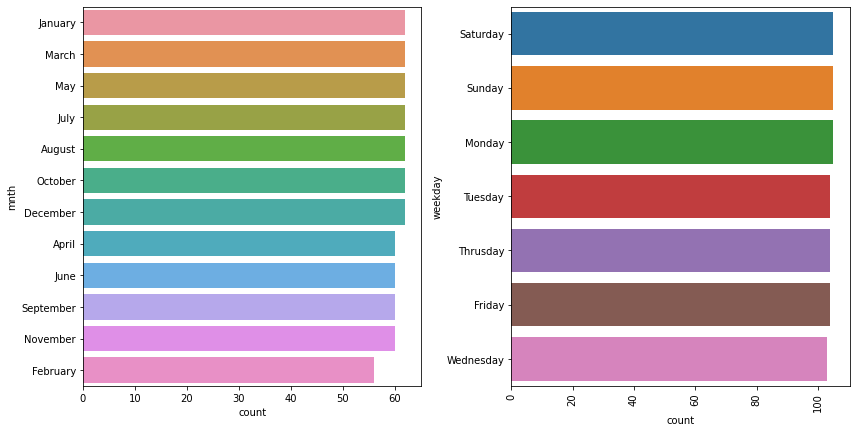

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.countplot(y=bike_data['mnth'],ax=axes[0],order = bike_data['mnth'].value_counts().index)
sns.countplot(y=bike_data['weekday'],ax=axes[1],order = bike_data['weekday'].value_counts().index)

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Trying to analyze the count different month and week day how it had affected the  bike sharing number

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


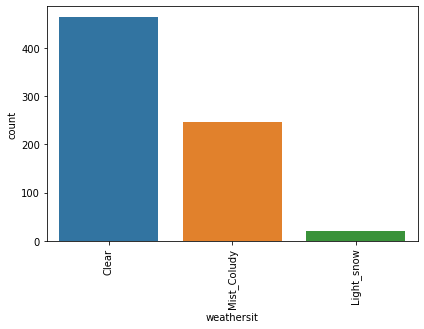

In [12]:
sns.countplot(bike_data['weathersit'],order = bike_data['weathersit'].value_counts().index)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

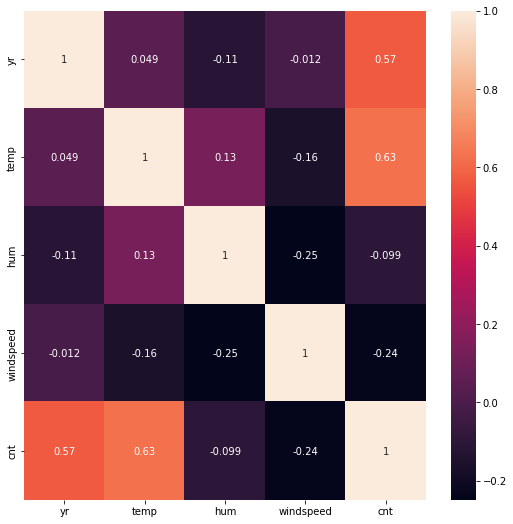

In [13]:
plt.figure(figsize=[9,9])
sns.heatmap(bike_data.corr(),  annot=True)
plt.show()

got a correlation between all the numerical variables and analyzed them with respect to cnt variable

In [14]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

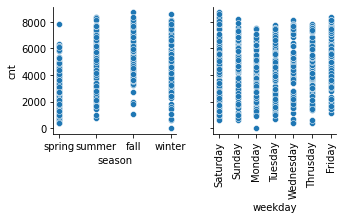

In [15]:

sns.pairplot(data=bike_data,x_vars=['season', 'weekday'],y_vars='cnt')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


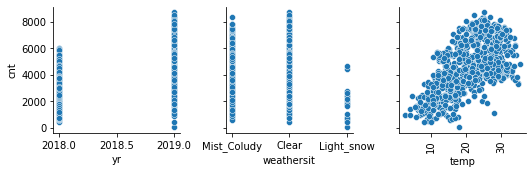

In [16]:
sns.pairplot(data=bike_data,x_vars=[ 'yr','weathersit', 'temp'],y_vars='cnt')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

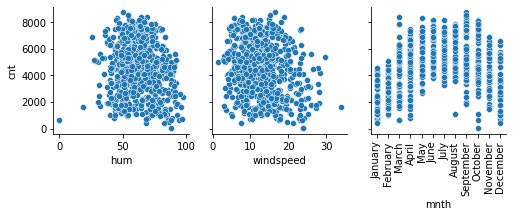

In [17]:
sns.pairplot(data=bike_data,x_vars=['hum', 'windspeed','mnth'],y_vars='cnt')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Analysed with various plot of cnt with other parameter

In [18]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 62.9+ KB


#Encoding

Applied dummy encording for the categorical variable 

In [19]:
status=pd.get_dummies(bike_data[['season','mnth','weekday','weathersit','holiday','workingday']],drop_first=True)
status


,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_Coludy,holiday_Official_holiday,workingday_Working
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Merging them with the main dataframe

In [20]:
result=pd.concat([bike_data,status],axis=1)
result.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_Coludy,holiday_Official_holiday,workingday_Working
0,spring,2018,January,Not_official_holiday,Saturday,Not_working,Mist_Coludy,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,1,0,0
1,spring,2018,January,Not_official_holiday,Sunday,Not_working,Mist_Coludy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,1,0,0
2,spring,2018,January,Not_official_holiday,Monday,Working,Clear,8.050924,43.7273,16.636703,...,1,0,0,0,0,0,0,0,0,1
3,spring,2018,January,Not_official_holiday,Tuesday,Working,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,0,0,1
4,spring,2018,January,Not_official_holiday,Wednesday,Working,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,1,0,0,0,1


Removing the previous categorical columns whose encoding is completed

In [21]:
result=result.drop(['season','mnth','weekday','weathersit','holiday','workingday'],axis=1)
result.head()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_Coludy,holiday_Official_holiday,workingday_Working
0,2018,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2018,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2018,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2018,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2018,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


#Normalization

Applied mim max scalar normalization to make very value between 0 and 1

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# X dataframe normalization

num_vars=['yr','temp','hum','windspeed','cnt']
result[num_vars]=scaler.fit_transform(result[num_vars])
result.head()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_Coludy,holiday_Official_holiday,workingday_Working
0,0.0,0.355170,0.828620,0.284606,0.110792,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.0,0.379232,0.715771,0.466215,0.089623,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.0,0.171000,0.449638,0.465740,0.152669,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,0.175530,0.607131,0.284297,0.177174,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.0,0.209120,0.449313,0.339143,0.181546,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
# check point to save the data in bike_data_enc variable
bike_data_enc=result

#Splitting the data

Getting the x part of the data removing only the  cnt variable and putting in X data frame

In [24]:
X=bike_data_enc.drop(['cnt','holiday_Official_holiday','season_spring','mnth_July','mnth_March'],1)

# trying to drop variable based on multiple model selection
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,yr,temp,hum,windspeed,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_Coludy,workingday_Working
0,0.0,0.355170,0.828620,0.284606,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0.0,0.379232,0.715771,0.466215,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0.171000,0.449638,0.465740,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0.0,0.175530,0.607131,0.284297,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0.0,0.209120,0.449313,0.339143,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


Getting the y part of the data taking only the  cnt variable and putting in y data frame as cnt is out target variable

In [25]:
y=bike_data_enc['cnt']
y=y.values.reshape(-1,1)
print(y.shape)



(730, 1)


Dividing the data in Test and train split with train as 70 and test as 30 ratio

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7,random_state=100)



print(X_train.shape)
print(X_test.shape)


print(y_train.shape)
print(y_test.shape)



(510, 24)
(220, 24)
(510, 1)
(220, 1)


#Prediction

Applying the const for variable other than cnt for our multiple linear regression, also applying OLS model to fit the normalised data

In [27]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     116.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.38e-184
Time:                        16:26:07   Log-Likelihood:                 525.72
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -895.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2234      0.043      5.151      0.000       0.138       0.309
yr                         0.2322      0.008     28.983      0.000       0.216       0.248
temp                       0.4538      0.033     13.576      0.000       0.388       0.519
hum                       -0.1549      0.038     -4.061      0.000      -0.230      -0.080
windspeed                 -0.1963      0.027     -7.395      0.000      -0.249      -0.144
season_summer              0.0747      0.015      4.986      0.000       0.045       0.104
season_winter              0.1328      0.022      5.946      0.000       0.089       0.177
mnth_August                0.0536      0.017      3.154      0.002       0.020       0.087
mnth_December             -0.0382      0.025     -1.509      0.132      -0.088       0.012
mnth_February             -0.0397      0.022     -1.827      0.068      -0.082       0.003
mnth_January              -0.0700      0.022     -3.174      0.002      -0.113      -0.027
mnth_June                  0.0177      0.018      0.977      0.329      -0.018       0.053
mnth_May                   0.0276      0.018      1.497      0.135      -0.009       0.064
mnth_November             -0.0284      0.029     -0.967      0.334      -0.086       0.029
mnth_October               0.0179      0.028      0.629      0.530      -0.038       0.074
mnth_September             0.1145      0.018      6.286      0.000       0.079       0.150
weekday_Monday            -0.0205      0.015     -1.340      0.181      -0.051       0.010
weekday_Saturday           0.0852      0.030      2.830      0.005       0.026       0.144
weekday_Sunday             0.0316      0.030      1.047      0.295      -0.028       0.091
weekday_Thrusday          -0.0090      0.016     -0.577      0.564      -0.039       0.022
weekday_Tuesday           -0.0181      0.016     -1.165      0.244      -0.049       0.012
weekday_Wednesday         -0.0059      0.015     -0.398      0.691      -0.035       0.023
weathersit_Light_snow     -0.2533      0.026     -9.656      0.000      -0.305      -0.202
weathersit_Mist_Coludy    -0.0591      0.010     -5.686      0.000      -0.080      -0.039
workingday_Working         0.0868      0.027      3.265      0.001       0.035       0.139
==============================================================================
Omnibus:                       81.924   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.513
Skew:                          -0.791   Prob(JB):                     1.31e-48
Kurtosis:                       5.806   Cond. No.                         28.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance mat

Predicting the R2 score for both Train and test

In [28]:
y_train_pred=lr_model.predict(X_train_sm)
print('Train R2 score:',r2_score(y_train, y_train_pred))
y_test_pred=lr_model.predict(X_test_sm)
print('Test R2 score:',r2_score(y_test, y_test_pred))


Train R2 score: 0.8517883502664847
Test R2 score: 0.8209957293354585


In [29]:
MSE_train=mean_squared_error(y_train, y_train_pred)
MSE_test=mean_squared_error(y_test, y_test_pred)

print('MSE Train :',MSE_train)
print('MSE Test :',MSE_test)

MSE Train : 0.007450001761056115
MSE Test : 0.008558960230584238


##Checking for the RFE value and Evaluation

In [30]:
lt=LinearRegression()
lt.fit(X_train,y_train)
rfe=RFE(lt)
rfe=rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 2),
 ('mnth_December', False, 4),
 ('mnth_February', False, 6),
 ('mnth_January', False, 3),
 ('mnth_June', False, 9),
 ('mnth_May', False, 7),
 ('mnth_November', False, 5),
 ('mnth_October', False, 8),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light_snow', True, 1),
 ('weathersit_Mist_Coludy', True, 1),
 ('workingday_Working', True, 1)]

Finding the feature which is useful for our Bike sharing part

In [31]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light_snow', 'weathersit_Mist_Coludy',
       'workingday_Working'],
      dtype='object')

Finding the feature which is not useful for our Bike sharing part

In [32]:
col=X_train.columns[~rfe.support_]
col

Index(['mnth_August', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_June', 'mnth_May', 'mnth_November', 'mnth_October',
       'weekday_Monday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

## Checking the VIF value

In [33]:

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,hum,34.70
1,temp,20.30
23,workingday_Working,18.69
5,season_winter,8.02
3,windspeed,5.78
16,weekday_Saturday,5.37
17,weekday_Sunday,5.20
12,mnth_November,4.53
13,mnth_October,4.37
4,season_summer,3.37


In [41]:
reg_sum=pd.DataFrame(X_train_sm.columns.values,columns=['Features'])
reg_sum['Weights']=lr_model.params.values
reg_sum.head(10)
# taking top 10 feature

,Features,Weights
0,const,0.223442
1,yr,0.232226
2,temp,0.453779
3,hum,-0.154925
4,windspeed,-0.196343
5,season_summer,0.074679
6,season_winter,0.132812
7,mnth_August,0.053579
8,mnth_December,-0.038232
9,mnth_February,-0.039744


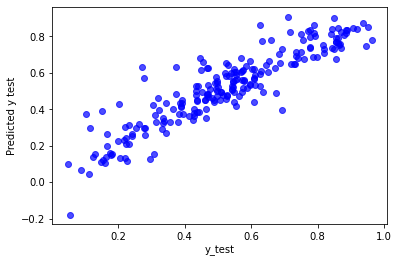

In [48]:
plt.scatter(y_test,y_test_pred,color='blue',alpha=0.7)
plt.xlabel('y_test',fontsize=10)
plt.ylabel('Predicted y test',fontsize=10)
plt.show()

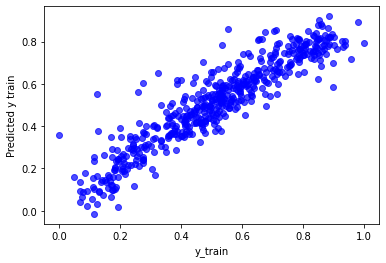

In [49]:
plt.scatter(y_train,y_train_pred,color='blue',alpha=0.7)
plt.xlabel('y_train',fontsize=10)
plt.ylabel('Predicted y train',fontsize=10)
plt.show()

#Conclusion

*Train* data R2: `85.17 `  *Test* data R2 : `82.02`